In [1]:
from datetime import datetime
start = datetime.now()

## Step 01 > 
Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os

# import dataviz libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# set 'root' directory
ICpath = r'C:\Users\joseh\Instacart Basket Analysis'

# import dataset
ords_prods_cxs_merge = pd.read_pickle(os.path.join(ICpath,'02 Data','Prepared Data','orders_products_customers.pkl'))

In [3]:
# review imported dataset
ords_prods_cxs_merge

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_from_customer,product_id,add_to_cart_order,reordered,...,loyalty_flag,spending_flag,order_frequency_flag,gender,state,date_joined,dependants,marital_status,income,birth_year
0,2539329,1,1,2,8,NaN,True,196,1,0,...,New customer,Low spender,Non-frequent customer,Female,Alabama,2/17/2019,3,married,40423,1988
1,2398795,1,2,3,7,15.0,False,196,1,1,...,New customer,Low spender,Non-frequent customer,Female,Alabama,2/17/2019,3,married,40423,1988
2,473747,1,3,3,12,21.0,False,196,1,1,...,New customer,Low spender,Non-frequent customer,Female,Alabama,2/17/2019,3,married,40423,1988
3,2254736,1,4,4,7,29.0,False,196,1,1,...,New customer,Low spender,Non-frequent customer,Female,Alabama,2/17/2019,3,married,40423,1988
4,431534,1,5,4,15,28.0,False,196,1,1,...,New customer,Low spender,Non-frequent customer,Female,Alabama,2/17/2019,3,married,40423,1988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,26,4,23,5.0,False,19675,1,1,...,Regular customer,High spender,Frequent customer,Male,Hawaii,5/26/2017,0,single,53755,1992
32404855,484769,66343,1,6,11,NaN,True,47210,1,0,...,New customer,Low spender,Non-frequent customer,Female,Tennessee,9/12/2017,3,married,46151,1995
32404856,1561557,66343,2,1,11,30.0,False,47210,1,1,...,New customer,Low spender,Non-frequent customer,Female,Tennessee,9/12/2017,3,married,46151,1995
32404857,276317,66343,3,6,15,19.0,False,47210,1,1,...,New customer,Low spender,Non-frequent customer,Female,Tennessee,9/12/2017,3,married,46151,1995


## Step 02 > 
If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

#### Note: completed while reading the material

## Step 03 >
You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
* In a markdown cell beneath your histogram, describe what the histogram demonstrates.


Text(0.5, 1.0, 'Histogram of Number of orders by Hour of Day')

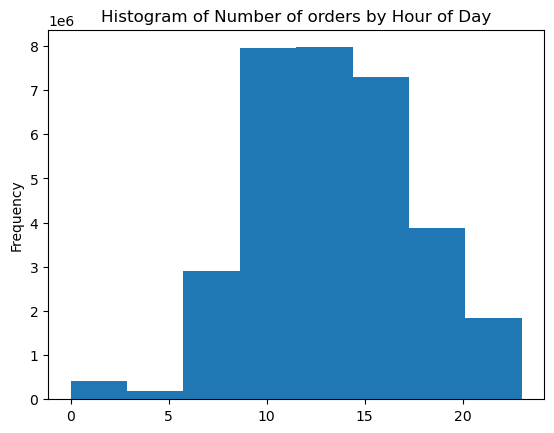

In [4]:
# histogram of the column 'hour_of_day'
hist1 = ords_prods_cxs_merge['order_hour_of_day'].plot.hist(bins=8)
plt.title('Histogram of Number of orders by Hour of Day')

In [5]:
#save the image to a file
hist1.figure.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','3_hr_vs_orders_histogram.png'),bbox_inches='tight')

In [6]:
ords_prods_cxs_merge['order_hour_of_day'].describe()

count    3.240486e+07
mean     1.342515e+01
std      4.246380e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

#### The histogram shows that
* the distribution is __right-skewed__ ( the mean is a larger than the median )
* the median and mean are around the $13^{th}$ hour (1pm)
* there is little activity the $6^{th}$ hour (6am)

## Step 04 >
The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the ```loyalty_flag``` column.

In [7]:
ords_prods_cxs_merge['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

In [8]:
# creating a categorical data with a custom order (not alphabetical) for loyalty_flag values
from pandas.api.types import CategoricalDtype
loyalty_order = CategoricalDtype(['New customer', 'Regular customer', 'Loyal customer'],
                                  ordered=True)

# assigning the new data type to loyalty_flag
ords_prods_cxs_merge['loyalty_flag'] = ords_prods_cxs_merge['loyalty_flag'].astype(loyalty_order)

Text(0.5, 1.0, 'Customer Loyalty Count')

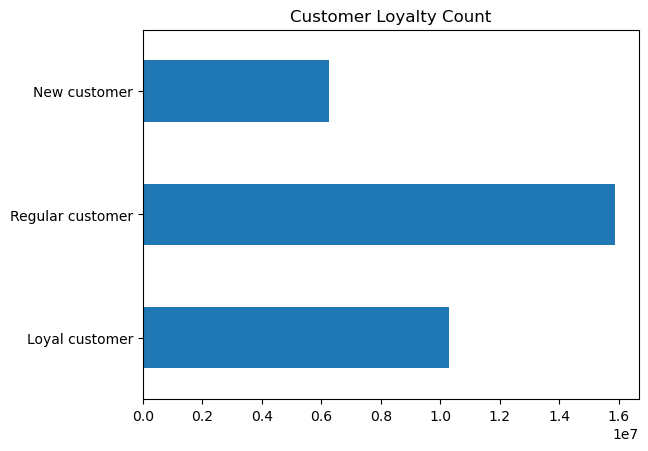

In [28]:
# choosing to do a horizontal bar --which I consider to be better for this case
bar = ords_prods_cxs_merge['loyalty_flag'].value_counts().sort_index(ascending=False).plot.barh()
plt.title('Customer Loyalty Count')

In [29]:
#save the image to a file
bar.figure.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','4_loyalty_bar_chart.png'),bbox_inches='tight')

## Step 5 > 
Check whether there’s a difference in expenditure (the ```prices``` column) depending on the hour of the day. 

_(Hint: To check this, you need to use an accurate sample for your line chart!)_

In [11]:
# setting a seed for the random number generator for reproducibility
np.random.seed(95)

#generating a sample vector 
sample_vector = np.random.rand(len(ords_prods_cxs_merge)) <= 0.7

#verifying  vector size 
len(sample_vector)

32404859

In [12]:
# sanity check od proportion of True entries
sample_vector.sum()/len(sample_vector)

0.6999980774488171

In [13]:
# create a large sample with appx 70% of all entries
large_sample = ords_prods_cxs_merge[sample_vector]

# and a small sample with the remaining appx 30%
small_sample = ords_prods_cxs_merge[~sample_vector]

Text(0.5, 1.0, 'Hour of Day vs Average Price')

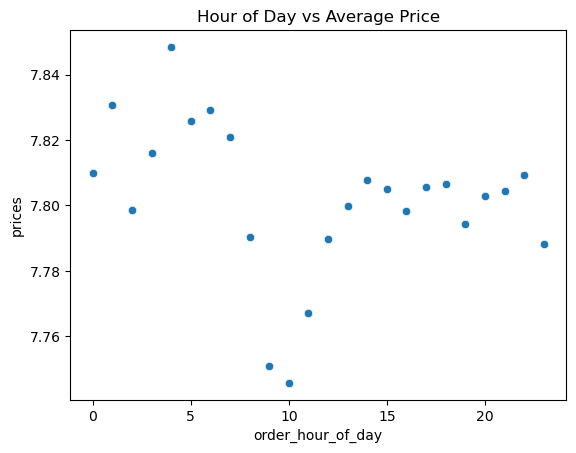

In [30]:
# ords_prods_cxs_merge.columns # used temporarily to review column names
# generate a scatterplot of hour_of_day VS average price
hour_vs_prices = sns.scatterplot(x = 'order_hour_of_day',
                y = small_sample.groupby('order_hour_of_day')['prices'].transform(np.mean),
                data = small_sample)
plt.title('Hour of Day vs Average Price')

In [31]:
# save the image to a file
hour_vs_prices.figure.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','5_hr_vs_avg_price.png'),bbox_inches='tight')

#### From the plot above we can conclude there is no relationship between ```prices``` and ```order_hour_of_day```
* I did a similar scatterplot with the large sample (70% of entries) and found similar results
* The mean price ranges from 7.75 to 7.84 in both sample data frames with a standard deviation of 0.02
* When I plotted a scatterplot of all prices VS hour_of_day I got the full spectrum of prices at every hour with darker spots in different prices that did not create or define a specific pattern

In [16]:
# code used to verify mean values
# for hr in range(24):
#    lmean = large_sample[large_sample['order_hour_of_day']==hr]['prices'].mean()
#    smean = small_sample[small_sample['order_hour_of_day']==hr]['prices'].mean()
#    print( hr, ' :  SM :', smean, '\t : LG :', lmean )

## Step 6 > 
Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. 
1. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependants.
2. In a markdown cell beneath your line chart, describe what the line chart shows.


In [17]:
# use only a subset of the columns needed for this analysis
demographics = small_sample[['marital_status','dependants','birth_year','income']]

In [18]:
# get the current year at runtime
current_year = datetime.today().year

# create an array of "age"
ages=[]
for yr in demographics['birth_year']:
    ages.append(current_year - yr)

In [19]:
# assign the newly created column to the dataframe
demographics['age']=ages

C:\Users\joseh\AppData\Local\Temp\ipykernel_21272\2658283928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographics['age']=ages


In [20]:
demographics

,marital_status,dependants,birth_year,income,age
2,married,3,1988,40423,35
3,married,3,1988,40423,35
5,married,3,1988,40423,35
6,married,3,1988,40423,35
8,married,3,1988,40423,35
...,...,...,...,...,...
32404836,single,0,1992,53755,31
32404838,single,0,1992,53755,31
32404846,single,0,1992,53755,31
32404850,single,0,1992,53755,31


Text(0.5, 1.0, 'age vs number of dependants')

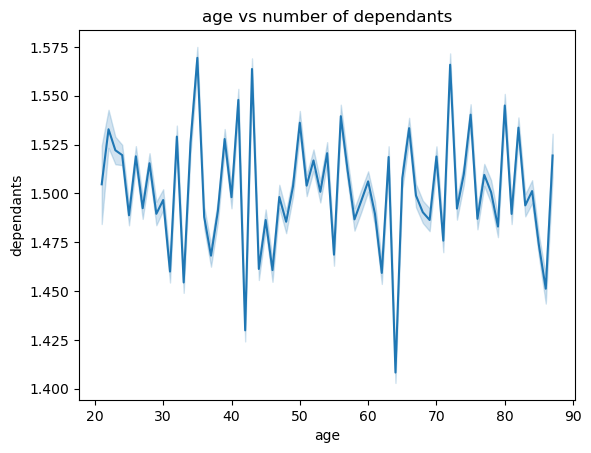

In [32]:
line = sns.lineplot(data = demographics, x = 'age', y = 'dependants')
plt.title('age vs number of dependants')

In [33]:
# save the image to a file
line.figure.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','6_age_vs_dependants.png'),bbox_inches='tight')

## Step 07 > 
You’ll also need to explore whether there’s a connection between ```age``` and spending power (```income```).
* To visualize this relationship, create a scatterplot using the ```sns.scatterplot()``` function.
* In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

Text(0.5, 1.0, 'age vs income - population')

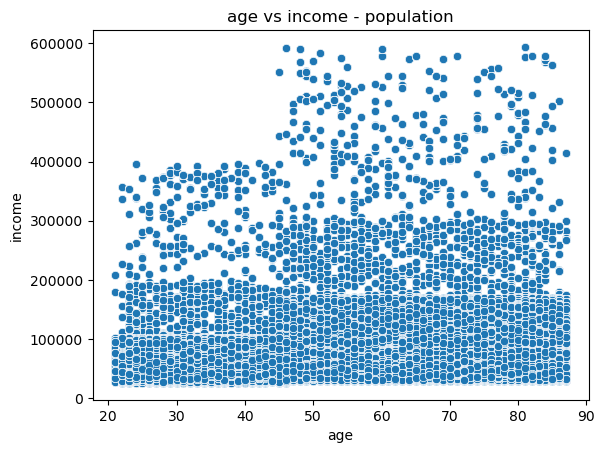

In [23]:
# creating a scatterlot from the same sample used in Step 6
age_vs_all_incomes = sns.scatterplot(x = 'age', y = 'income', data = demographics)
plt.title('age vs income - population')

Text(0.5, 1.0, 'age vs average income - population')

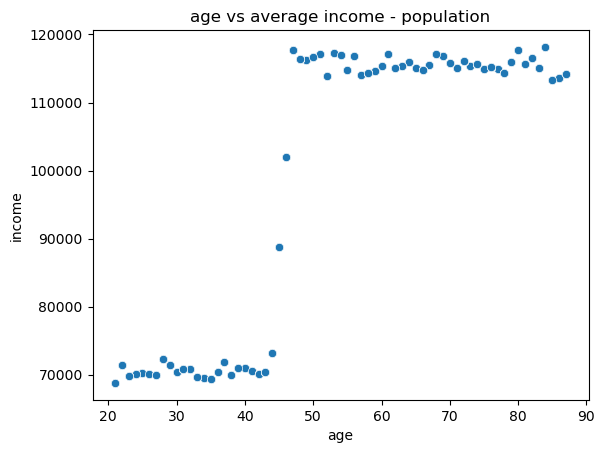

In [24]:
age_vs_avg_income = sns.scatterplot(x = 'age',
                                    y = demographics.groupby('age')['income'].transform(np.mean),
                                    data = demographics)
plt.title('age vs average income - population')

In [25]:
#save images
age_vs_all_incomes.figure.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','7_age_vs_all_incomes.png'),bbox_inches='tight')
age_vs_avg_income.figure.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','7_age_vs_avg_income.png'),bbox_inches='tight')

#### From the scatterplots above I can conclude
* Income data for people with <= 45 yrs of age is heavily concentrated at < 200K
* Income data for people with >  45 yrs of age is heavily concentrated at < 300K
* There are higher incomes above these big blocks BUT with a lower density

#### Plotting the average income, so as to aggregate incomes for each age looks like a step function
* On average, people <= 45 yrs of age have a mean income of 71K
* On average, people >  45 yrs of age have a mean income of 115K

In [26]:
# code used to verify average income levels for each age
# ommitted here for simplicity
# for x in range(21,88):
#    print( x, ' : ', demographics[demographics['age']==x]['income'].mean())

## Step 8 - 9 > 
8. Export your visualizations as “.png” files in your relevant project folder.
9. Save your notebook from part 2 of this Exercise’s task.

screenshot of images saved
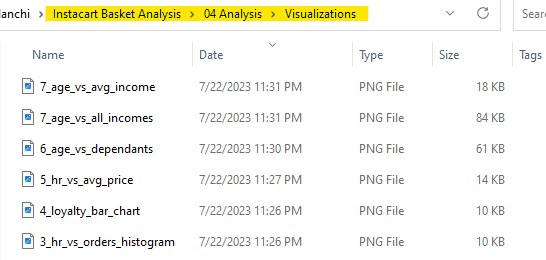

In [27]:
duration = datetime.now() - start
print(duration)

0:05:25.440100
